In [2]:
import numpy as np
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log
import pprint

In [4]:
df = pd.read_csv('weather.csv')

In [5]:
df.head(15)

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


**Get Information/Entropy (Info(D))**

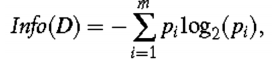


***Info(D)*** is just the average amount of information needed to identify the class label of a tuple in D. Also known as ***entropy*** of D. 

*pi* is the probability that an arbitrary tuple in D belongs to class Ci (number of values in D belonging to Ci) and is estimated by |Ci,D|/|D|.

In [6]:
## CALCULATE INFORMATION/ENTROPY NEEDED TO CLASSIFY NEW TUPLE

def info_d(df):
    target = df.keys()[-1]   #Get target variable column name
    uvalues = df[target].unique()  #Unique values in the target: 'Yes', 'No'

    entropy = 0 #Initialize Info(D) to 0
    for value in uvalues:
        weight = df[target].value_counts()[value]/len(df[target])
        entropy += -weight*np.log2(weight)
    return entropy


### **Function to get InfoGain from a particular attribute**

### 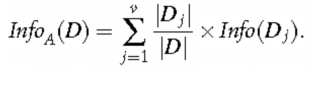

Using the formula shown above, we get the info gain for each attribute in the dataset. Using that we get the entropy for each atribute needed to decide the node of every level in the decision tree.

In [6]:
def info_a(df,attribute):
  target = df.keys()[-1]   #Get target variable class name
  target_classes = df[target].unique()  #Target Classes: 'Yes' and 'No' here
  values = df[attribute].unique()    #Get all unique values from the particular attribute/column
  info_a = 0

  for val in values:
      entropy = 0
      den = len(df[attribute][df[attribute]==val])
      for class_ in target_classes:
          fraction = len(df[attribute][df[attribute]==val][df[target] ==class_])/(den+eps) #Info(Dj) from the formula shown above
          #eps adds a infinitesmal small value to avoid NaN or infinity
          entropy += -fraction*log(fraction+eps)
      fraction2 = abs(den/len(df)) #|Dj|/|D|
      info_a += -fraction2*entropy #Get InfoA(D)
  return abs(info_a)

### **Choose the attribute with the highest Info gain**###

***Information gain*** is defined as the difference between the original information requirement (Info(D)) and the new requirement (InfoA(Dj) after partitioning on A).

The attribute A with the highest information gain is chosen as the splitting attribute at a given node.

In [7]:
def info_gain(df):
    InfoGain = []
    for key in df.keys()[:-1]:
        InfoGain.append(info_d(df)-info_a(df,key))
    print(InfoGain)
    return df.keys()[:-1][np.argmax(InfoGain)]
  
def find_subset(df, node,value):
  return df[df[node] == value].reset_index(drop=True)

### **Recursive Function to Build Tree**

Build tree until all subsets are classified or info gain is minimal

In [8]:
def buildTree(df,tree=None): 

  #Get max information gain attribute to select the node to split at
  node = info_gain(df)
  print(node)
  atr = np.unique(df[node]) #Values to build the tree branches (sub-tree) below
  #These attributes decide which of them to split on further
  
  #Initialize or create an empty tree    
  if tree is None:                    
    tree={}
    tree[node] = {}
  
  #Check purity of subset and stop recursion when minimum purity
  for value in atr:
    subset = find_subset(df,node,value)
    clValue, count = np.unique(subset['play'], return_counts=True)                        
    
    if len(count)==1:
        tree[node][value] = clValue[0]                                                    
    else:        
        tree[node][value] = buildTree(subset) #Recursive call
                  
  return tree

In [9]:
tree = buildTree(df)

In [10]:
pprint.pprint(tree)

{'outlook': {'overcast': 'yes',
             'rainy': {'windy': {False: 'yes', True: 'no'}},
             'sunny': {'humidity': {'high': 'no', 'normal': 'yes'}}}}
